<a href="https://colab.research.google.com/github/grandfatherr/KNN-and-Naive-Bayes/blob/main/Edwin_Mutuma_Core_Week_9_IP_Naive_Bayes_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the Question

### a) Specifying the Data Analytic Question

We have been given a dataset containing details on emails with malicious and legitimate information, with the features describing what kind of content is in these emails, we are required to use the Naive Bayes Classifier to identify an email as spam or not spam.


### b) Defining the Metric for Success

### c) Understanding the context 

Accurate spam detection is considered a difficult task due to several reasons including:

subjective nature of spam - for instance, a message containing several drug names might be a spam, but it might not be the case if the message is exchanged in a context of medical organizations
This study will therefore make use of the Naive Bayes Classifier to detect if an email is spam or not.


### d) Recording the Experimental Design

For the project to be a success, the following steps will be followed:

Read and explore the given dataset.

Clean the data

Perform exploratory data analysis.

Perform feature engineering

Creating our Model

Challenge your solution by providing insights on how you can make improvements in model improvement.


### e) Data Relevance

## Reading the Data

In [ ]:
# Import the necessary libraries to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('spambase (1).csv', names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam'])

## Checking the Data

In [ ]:
# View the top of the dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# preview the tail
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Check the shape of the dataset
df.shape

(4601, 58)

In [ ]:
# Accessing information on our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## Tidying the Dataset

In [ ]:
# Checking the missing values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
# Checking the duplicates
df.duplicated().sum()

391

In [ ]:
# Check what data is duplicated
df[df.duplicated()]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,8.33,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [ ]:
# Dropping the duplicated data values
df.dropna(inplace=True)

## Exploratory Analysis

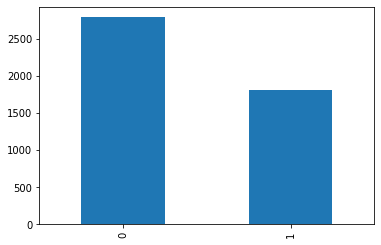

<Figure size 1008x648 with 0 Axes>

In [ ]:
df['spam'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

In [ ]:
# Heatmap for the correlation
correlations = df.corr()
correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0.05

## Feature engineering

In [ ]:
# Perform a VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.137355,0.014601,-0.005871,-0.013668,0.010820,-0.015294,0.044902,0.061721,-0.052735,0.009594,-0.149041,-0.077051,-0.020227,-0.004583,0.049364,-0.029332,-0.036256,-0.019202,-0.027836,0.034861,-0.122646,0.013944,-0.113831,-0.165037,0.021706,0.005327,0.030866,-0.001154,0.026683,0.017757,-0.000314,0.497120,0.019209,-0.583135,0.007110,0.022019,0.032999,0.001776,-0.015947,0.050611,-0.019403,0.000058,-0.011879,0.007090,0.014394,0.016199,0.002033,0.007237,0.011753,-0.009953,0.020658,-0.026038,-0.042837,0.002413,-0.036653,0.015805,-0.038955,0.070737
word_freq_address,0.014601,1.036608,0.032521,0.012378,0.019420,0.022875,-0.004723,0.018430,0.006457,-0.044905,-0.004102,0.044420,0.025502,0.005884,0.001460,0.009732,0.005754,-0.052119,0.087626,0.013068,0.010479,0.018786,0.008758,-0.016854,0.060442,0.029014,0.082246,0.012654,0.006937,0.022648,0.008041,-0.260573,0.039698,0.124799,0.016360,0.048872,0.020861,0.007205,0.007501,0.023025,0.009192,0.031275,-0.004100,0.034756,0.023294,0.045879,0.014471,0.024474,0.008986,0.088280,0.023421,0.005324,-0.010750,-0.007639,0.019678,-0.063956,0.035431,0.072290
word_freq_all,-0.005871,0.032521,1.114599,0.028685,-0.014375,-0.022949,0.034024,0.033940,-0.027180,0.021883,0.031494,-0.059675,-0.005728,0.009537,-0.065414,-0.021838,0.029117,-0.062738,-0.068314,0.005037,-0.081736,0.045920,-0.045827,0.025973,0.042555,-0.001830,0.068990,0.008428,0.051435,-0.061580,-0.033975,-0.095421,0.033313,0.124590,0.013891,-0.021683,0.020373,-0.035802,-0.016543,0.043633,-0.000278,-0.033938,0.010661,0.042386,0.035924,0.035287,-0.034354,0.013518,0.003772,-0.013260,0.013079,-0.061847,0.004721,0.009757,-0.087736,-0.010187,-0.003596,-0.092078
word_freq_3d,-0.013668,0.012378,0.028685,1.010332,0.008243,0.023166,-0.003836,-0.003342,0.016065,0.007092,0.024621,0.015773,0.022078,-0.009908,0.006257,0.010854,0.003927,-0.014909,0.027505,0.016452,0.004632,-0.021918,0.000466,-0.028069,0.005828,0.002941,0.012204,0.002748,-0.002752,-0.001922,0.001085,-0.032954,0.005586,0.016075,-0.002558,0.003141,-0.002045,-0.000103,-0.005678,0.010731,0.000960,0.002514,0.002449,0.003930,0.005326,0.004523,0.001321,-0.000619,0.008895,0.026326,0.005507,0.013890,0.004199,0.010305,0.014481,-0.036785,0.001316,-0.077311
word_freq_our,0.010820,0.019420,-0.014375,0.008243,1.150843,-0.002074,-0.059243,0.037241,0.047341,-0.003270,0.012334,-0.043428,-0.007250,0.000094,-0.029633,-0.018498,-0.100360,-0.011135,-0.032308,0.027645,-0.040122,0.042320,0.008761,0.063758,-0.003804,0.028738,0.047098,0.017504,-0.016861,0.002523,0.018550,-0.151175,0.003599,0.061823,0.007479,0.019506,0.012032,-0.136785,0.012449,0.033746,0.005137,-0.135402,0.010849,-0.041283,0.008279,0.041413,0.021373,0.014514,-0.008394,0.021484,0.002021,0.047426,0.037941,0.008945,-0.035641,-0.026908,0.054939,-0.263328
word_freq_over,-0.015294,0.022875,-0.022949,0.023166,-0.002074,1.109913,0.004750,-0.033147,-0.047835,0.048370,0.018635,0.004000,-0.031804,0.010863,-0.092437,0.039496,0.006924,-0.005816,-0.021705,-0.018999,-0.006427,0.008434,-0.127299,-0.005016,0.014625,0.029446,0.030098,0.021957,0.002391,-0.023755

In [ ]:
# Drop the highly correlated columns
df.drop(['word_freq_857','word_freq_415'],axis=1,inplace=True)

In [ ]:
# Separating our target label (type) from the other features
feat = df.drop(['spam'], 1)
type_label = df['spam']

# Subject our features to LDA model
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, type_label)
lda_feat = lda.transform(feat)

# Display the coeficients of the reduced columns
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
char_freq_$,2.215654
word_freq_remove,2.028683
word_freq_000,1.661482
word_freq_over,1.138355
word_freq_internet,0.891298
word_freq_money,0.865123
word_freq_our,0.805432
word_freq_free,0.715135
word_freq_order,0.696520
char_freq_!,0.648843


## Implementing the Solution

### 80-20 split

In [ ]:
# Use a couple of our variables as our features
X = df[['char_freq_$', 'word_freq_remove', 'word_freq_000',	'word_freq_over', 'word_freq_internet', 
        'word_freq_money', 'word_freq_our', 'word_freq_free', 'word_freq_order', 'char_freq_!', 
        'word_freq_direct',	'word_freq_credit',	'word_freq_receive', 'word_freq_email']]
y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import Normalizer
# Create normalizer
norm = Normalizer(norm='l2')

# Transform feature matrix
norm.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.82011303],
       [0.19761329, 0.23054884, 0.47207619, ..., 0.        , 0.23054884,
        0.30739845],
       [0.0841312 , 0.08687461, 0.53039237, ..., 0.14631514, 0.17374922,
        0.47095184],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))

print(classification_report(y_test, y_pred))

0.8099891422366993
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       538
           1       0.87      0.64      0.74       383

    accuracy                           0.81       921
   macro avg       0.83      0.79      0.79       921
weighted avg       0.82      0.81      0.80       921



### 70-30 split

In [ ]:
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training our model
# 
clf = GaussianNB()  
model_2 = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model_2.predict(X_test)
print(accuracy_score(y_pred,y_test))

print(classification_report(y_test, y_pred))

0.8196958725561188
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       822
           1       0.88      0.65      0.74       559

    accuracy                           0.82      1381
   macro avg       0.84      0.79      0.80      1381
weighted avg       0.83      0.82      0.81      1381



### 60-40 split

In [ ]:
# Train using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Training our model
# 
clf = GaussianNB()  
model_3 = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model_3.predict(X_test)
print(accuracy_score(y_pred,y_test))

print(classification_report(y_test, y_pred))

0.8142313959804454
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1097
           1       0.86      0.65      0.74       744

    accuracy                           0.81      1841
   macro avg       0.83      0.79      0.80      1841
weighted avg       0.82      0.81      0.81      1841



## Challenging the solution

### Hyperparameter tuning


In [ ]:
# Getting the parameters for our algorithm
mod=GaussianNB()
mod.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Finding the best parameters to use
params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.model_selection import GridSearchCV
nb = GridSearchCV(estimator=mod, param_grid=params, verbose=1, cv=10, n_jobs=-1)
nb.fit(X_train, y_train)
print(nb.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.1s


{'var_smoothing': 0.0002310129700083158}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


In [ ]:
# Training our model
# 
clf = GaussianNB(var_smoothing=0.0002310129700083158, priors=None)  
model_4 = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model_4.predict(X_test)
print(accuracy_score(y_pred,y_test))

print(classification_report(y_test, y_pred))

0.8136882129277566
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1097
           1       0.86      0.64      0.74       744

    accuracy                           0.81      1841
   macro avg       0.83      0.79      0.80      1841
weighted avg       0.82      0.81      0.81      1841



Even after getting the best parameters to use in our model, the 70-30 split gave us the highest accuracy level of the models

## Follow up questions

### a). Did we have the right data?

Yes we did have the right data.

### b). Do we need other data to answer our question?

We could use more data but it was okay as was.

### c). Did we have the right question?

Yes we did have the right question